#**importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#**data cleaning**

In [ ]:
#Reading the dataset
df=pd.read_csv("train-chennai-sale.csv")
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [ ]:
#Understanding the dataset
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [ ]:
#Understanding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
#Checking for NAN values
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
#Filling NAN values
df["N_BEDROOM"]=df["N_BEDROOM"].fillna(df["N_BEDROOM"].mode()[0])
df["N_BATHROOM"]=df["N_BATHROOM"].fillna(df["N_BATHROOM"].mode()[0])
df["QS_OVERALL"]=df["QS_OVERALL"].fillna(df["QS_OVERALL"].mean())

In [ ]:
#Changing some data types and also changing some columns
df["N_BEDROOM"]=df["N_BEDROOM"].astype("int64")
df["N_BATHROOM"]=df["N_BATHROOM"].astype("int64")
df["DATE_SALE"]=pd.to_datetime(df["DATE_SALE"])
df["DATE_BUILD"]=pd.to_datetime(df["DATE_BUILD"])
df["YEAR_SALE"]=df["DATE_SALE"].dt.year
df["YEAR_BUILD"]=df["DATE_BUILD"].dt.year
df["AGE_SOLD"]=df["YEAR_SALE"]-df["YEAR_BUILD"]
df.drop(["DATE_SALE","DATE_BUILD","YEAR_SALE","YEAR_BUILD"],axis=1,inplace=True)
df["TOTAL_SALES_PRICE"]=df["SALES_PRICE"]+df["COMMIS"]+df["REG_FEE"]
df=df.drop(["PRT_ID","REG_FEE","COMMIS","SALES_PRICE"],axis=1)

In [ ]:
df["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
df["AREA"].replace(["Ana Nagar","Ann Nagar","Adyr","Chrompt","Chrmpet","Chormpet","Karapakam","KKNagar","Velchery","TNagar"],
["Anna Nagar","Anna Nagar","Adyar","Chrompet","Chrompet","Chrompet","Karapakkam","KK Nagar","Velachery","T Nagar"],
inplace=True)

In [ ]:
df["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
df["SALE_COND"].replace(["Ab Normal","Adj Land","Partiall","PartiaLl"],["AbNormal","AdjLand","Partial","Partial"],inplace=True)

In [ ]:
df["PARK_FACIL"].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
df["PARK_FACIL"].replace(["Noo"],["No"],inplace=True)

In [ ]:
df["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
df["BUILDTYPE"].replace(["Comercial","Other"],["Commercial","Others"],inplace=True)

In [ ]:
df["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
df["UTILITY_AVAIL"].replace(["All Pub","NoSewr ","NoSeWa"],["AllPub","No Sewer","No Sewer"],inplace=True)

In [ ]:
df["STREET"].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
df["STREET"].replace(["NoAccess","Pavd"],["No Access","Paved"],inplace=True)

#**data visualization**

In [ ]:
#Preparing data for plotting
a0=df["AREA"].value_counts()
b0=df["BUILDTYPE"].value_counts()
c0=df["MZZONE"].value_counts()
d0=df["N_BEDROOM"].value_counts()
e0=df["N_BATHROOM"].value_counts()
f0=df["PARK_FACIL"].value_counts()
g0=df["SALE_COND"].value_counts()
h0=df["STREET"].value_counts()
i0=df["UTILITY_AVAIL"].value_counts()

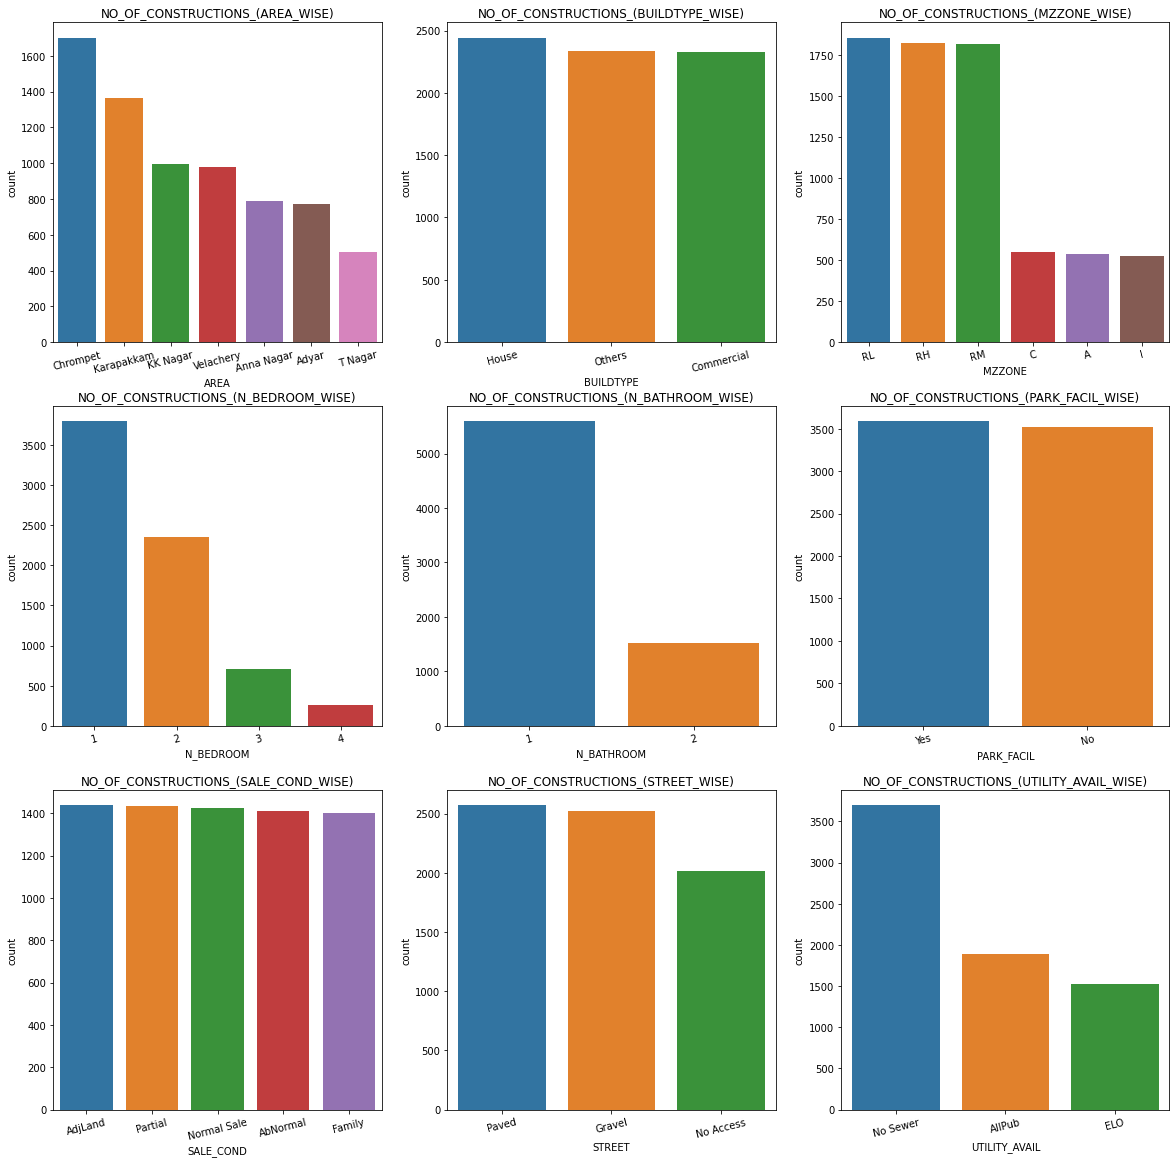

In [ ]:
#Plotting
plt.figure(figsize=(20,20))
plt.subplot(331)
sns.barplot(x=a0.index,y=a0.values)
plt.title("NO_OF_CONSTRUCTIONS_(AREA_WISE)")
plt.xticks(rotation=14)
plt.xlabel("AREA")
plt.ylabel("count")
plt.subplot(332)
sns.barplot(x=b0.index,y=b0.values)
plt.title("NO_OF_CONSTRUCTIONS_(BUILDTYPE_WISE)")
plt.xticks(rotation=14)
plt.xlabel("BUILDTYPE")
plt.ylabel("count")
plt.subplot(333)
sns.barplot(x=c0.index,y=c0.values)
plt.title("NO_OF_CONSTRUCTIONS_(MZZONE_WISE)")
plt.xticks(rotation=14)
plt.xlabel("MZZONE")
plt.ylabel("count")
plt.subplot(334)
sns.barplot(x=d0.index,y=d0.values)
plt.title("NO_OF_CONSTRUCTIONS_(N_BEDROOM_WISE)")
plt.xticks(rotation=14)
plt.xlabel("N_BEDROOM")
plt.ylabel("count")
plt.subplot(335)
sns.barplot(x=e0.index,y=e0.values)
plt.title("NO_OF_CONSTRUCTIONS_(N_BATHROOM_WISE)")
plt.xticks(rotation=14)
plt.xlabel("N_BATHROOM")
plt.ylabel("count")
plt.subplot(336)
sns.barplot(x=f0.index,y=f0.values)
plt.title("NO_OF_CONSTRUCTIONS_(PARK_FACIL_WISE)")
plt.xticks(rotation=14)
plt.xlabel("PARK_FACIL")
plt.ylabel("count")
plt.subplot(337)
sns.barplot(x=g0.index,y=g0.values)
plt.title("NO_OF_CONSTRUCTIONS_(SALE_COND_WISE)")
plt.xticks(rotation=14)
plt.xlabel("SALE_COND")
plt.ylabel("count")
plt.subplot(338)
sns.barplot(x=h0.index,y=h0.values)
plt.title("NO_OF_CONSTRUCTIONS_(STREET_WISE)")
plt.xticks(rotation=14)
plt.xlabel("STREET")
plt.ylabel("count")
plt.subplot(339)
sns.barplot(x=i0.index,y=i0.values)
plt.title("NO_OF_CONSTRUCTIONS_(UTILITY_AVAIL_WISE)")
plt.xticks(rotation=14)
plt.xlabel("UTILITY_AVAIL")
plt.ylabel("count")
plt.show()


In [ ]:
#Preparing for plotting
a1=df.groupby("AREA")["TOTAL_SALES_PRICE"].mean().sort_values()
b1=df.groupby("BUILDTYPE")["TOTAL_SALES_PRICE"].mean().sort_values()
c1=df.groupby("MZZONE")["TOTAL_SALES_PRICE"].mean().sort_values()
d1=df.groupby("N_BEDROOM")["TOTAL_SALES_PRICE"].mean().sort_values()
e1=df.groupby("N_BATHROOM")["TOTAL_SALES_PRICE"].mean().sort_values()
f1=df.groupby("PARK_FACIL")["TOTAL_SALES_PRICE"].mean().sort_values()
g1=df.groupby("SALE_COND")["TOTAL_SALES_PRICE"].mean().sort_values()
h1=df.groupby("STREET")["TOTAL_SALES_PRICE"].mean().sort_values()
i1=df.groupby("UTILITY_AVAIL")["TOTAL_SALES_PRICE"].mean().sort_values()

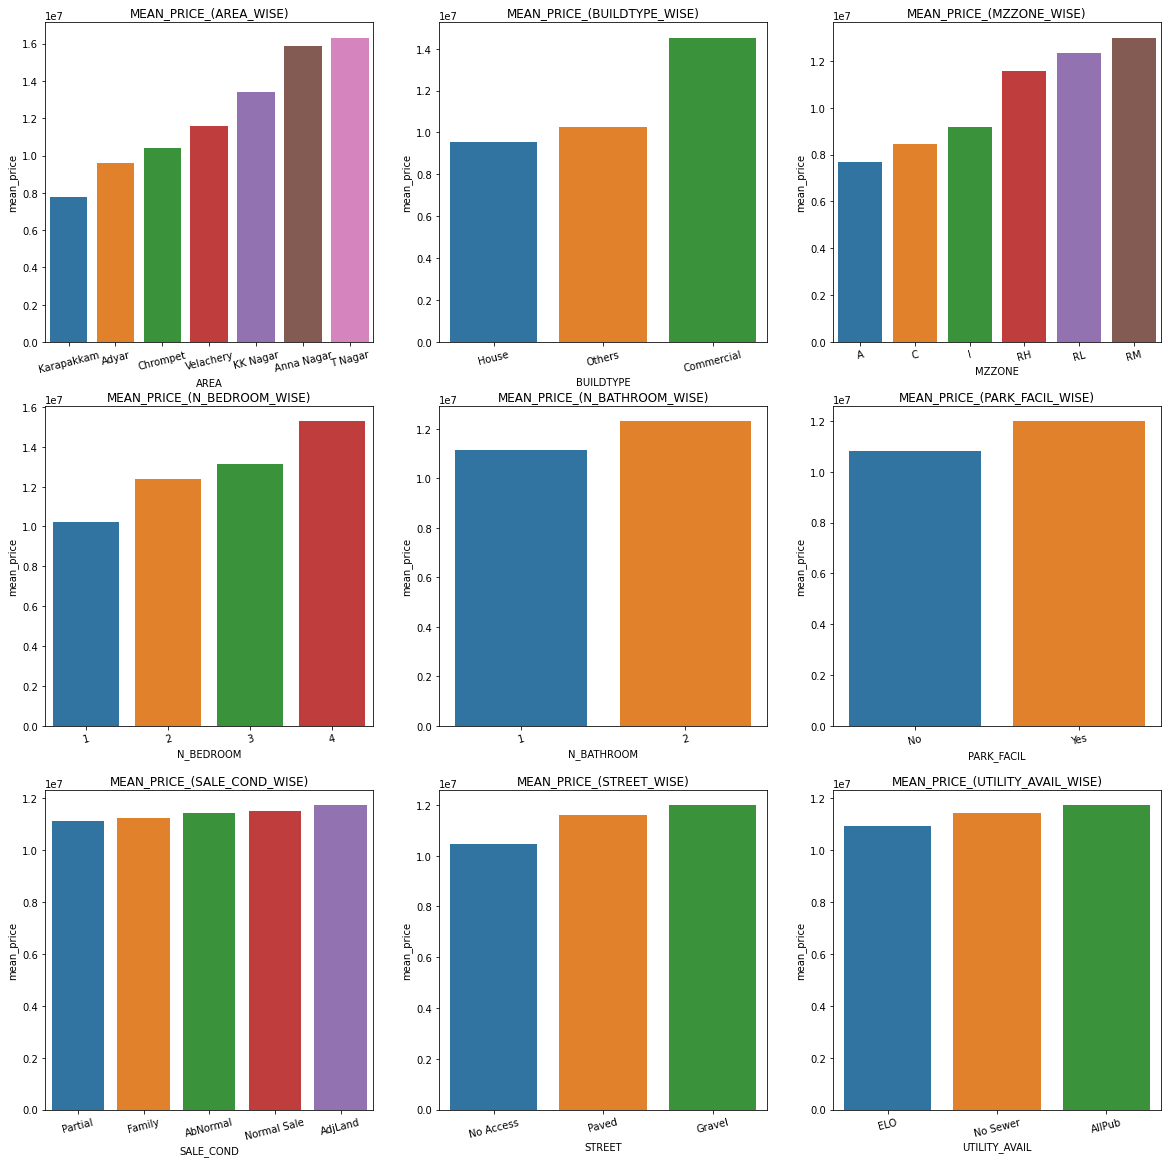

In [ ]:
#Plotting
plt.figure(figsize=(20,20))
plt.subplot(331)
sns.barplot(x=a1.index,y=a1.values)
plt.title("MEAN_PRICE_(AREA_WISE)")
plt.xticks(rotation=14)
plt.ylabel("mean_price")
plt.subplot(332)
sns.barplot(x=b1.index,y=b1.values)
plt.title("MEAN_PRICE_(BUILDTYPE_WISE)")
plt.xticks(rotation=14)
plt.ylabel("mean_price")
plt.subplot(333)
sns.barplot(x=c1.index,y=c1.values)
plt.title("MEAN_PRICE_(MZZONE_WISE)")
plt.xticks(rotation=14)
plt.ylabel("mean_price")
plt.subplot(334)
sns.barplot(x=d1.index,y=d1.values)
plt.title("MEAN_PRICE_(N_BEDROOM_WISE)")
plt.xticks(rotation=14)
plt.ylabel("mean_price")
plt.subplot(335)
sns.barplot(x=e1.index,y=e1.values)
plt.title("MEAN_PRICE_(N_BATHROOM_WISE)")
plt.xticks(rotation=14)
plt.ylabel("mean_price")
plt.subplot(336)
sns.barplot(x=f1.index,y=f1.values)
plt.title("MEAN_PRICE_(PARK_FACIL_WISE)")
plt.xticks(rotation=14)
plt.ylabel("mean_price")
plt.subplot(337)
sns.barplot(x=g1.index,y=g1.values)
plt.title("MEAN_PRICE_(SALE_COND_WISE)")
plt.xticks(rotation=14)
plt.ylabel("mean_price")
plt.subplot(338)
sns.barplot(x=h1.index,y=h1.values)
plt.title("MEAN_PRICE_(STREET_WISE)")
plt.xticks(rotation=14)
plt.ylabel("mean_price")
plt.subplot(339)
sns.barplot(x=i1.index,y=i1.values)
plt.title("MEAN_PRICE_(UTILITY_AVAIL_WISE)")
plt.xticks(rotation=14)
plt.ylabel("mean_price")
plt.show()


#**data preprocessing**

In [ ]:
#Manual encoding
df["AREA"].replace(a1.index,[0,1,2,3,4,5,6],inplace=True)
df["BUILDTYPE"].replace(b1.index,[0,1,2],inplace=True)
df["MZZONE"].replace(c1.index,[0,1,2,3,4,5],inplace=True)
df["PARK_FACIL"].replace(f1.index,[0,1],inplace=True)
df["SALE_COND"].replace(g1.index,[0,1,2,3,4],inplace=True)
df["STREET"].replace(h1.index,[0,1,2],inplace=True)
df["UTILITY_AVAIL"].replace(i1.index,[0,1,2],inplace=True)

In [ ]:
#Split into features and target 
X=df.drop(columns="TOTAL_SALES_PRICE")
y=df["TOTAL_SALES_PRICE"]

In [ ]:
#Split into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=47)

In [ ]:
#Scaling
slr=StandardScaler()
slr.fit(X_train)
X_train_scaled=slr.transform(X_train)
X_test_scaled=slr.transform(X_test)

#**machine learning**

In [ ]:
#Linear regression
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
#lr_y_pred=lr.predict(X_test_scaled)
print(lr.score(X_train_scaled,y_train))
print(lr.score(X_test_scaled,y_test))

0.8852353747214387
0.8805487107402163


In [ ]:
rfr_trn_r=[]
rfr_tes_r=[]
mx_d=[]
for i in range(1,30):
  rfr=RandomForestRegressor(n_estimators=500,max_depth=i,max_features='sqrt',random_state=47)
  rfr.fit(X_train_scaled,y_train)
  rfr_trn_r.append(rfr.score(X_train_scaled,y_train))
  rfr_tes_r.append(rfr.score(X_test_scaled,y_test))
  mx_d.append(i)
for i,j,k in zip(mx_d,rfr_trn_r,rfr_tes_r):
  print(i,j,k)

1 0.4057723699672944 0.40188409044449236
2 0.6338384475004769 0.6312835041142073
3 0.769928262995493 0.7681570633286238
4 0.8519617630628744 0.8492703842629158
5 0.9003011914205408 0.8957508576376263
6 0.9334237808749029 0.9270560750605198
7 0.9537228649462097 0.9458043421738929
8 0.9680138876409354 0.9578589030594487
9 0.9786881584458546 0.9665564184586817
10 0.9855650828689814 0.971339553049013
11 0.990234192723523 0.9746493834704117
12 0.993316565796891 0.977039274139347
13 0.9950425576601026 0.9778787883571582
14 0.9961726787040088 0.9789052242201379
15 0.996676129965151 0.9789227053625555
16 0.9969791872405306 0.9794118485913871
17 0.9971091287124857 0.9795961207618549
18 0.9971982724835795 0.9796242277130293
19 0.997140382703444 0.9793742186786794
20 0.99720265734457 0.9795065182831861
21 0.9971710649706295 0.9793198768656127
22 0.9971856622838084 0.9796906719872199
23 0.9971796376999238 0.9796428728948215
24 0.997180020233704 0.9796172750962966
25 0.9971873621347219 0.9796078166

In [ ]:
#XGBoost XGBRegressor
xgr=XGBRegressor()
xgr.fit(X_train_scaled,y_train)
#xgr_y_pred=xgr.predict(X_test_scaled)
print(xgr.score(X_train_scaled,y_train))
print(xgr.score(X_test_scaled,y_test))

[15:41:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9917912402270945
0.9894966695203846


#**conclusion**
Data cleaning, data visualization and data preprocessing has been done after that built a machine learning model using linear regression, random forest regressor and xgboost regressor among these xgboost regressor had given good score.

If somebody wants to buy a house they should ask themselves some questions, for example if somebody wants to buy a house in a particular area, from data we can get maximum house price and minimum house price in that area and we can get a price range in that area.